# Programming for Data Analysis   
# Semester 2 Project 2018
### Student:    David O'Brien
### Student ID: G00364766

### Creating a dataset


## Choosing a Phenonmenon
As someone who likes to go for the occassional run and analyse the various statistics my Garmin Forerunner watch provides me with at the end of the run, I have decided to look at the performance of runners throughout a given year.  Any person that owns a garmin watch is able to log their run.  The data recorded on this run is then saved onto Garmins database, where it is used to generate insights for individual runners.  Below, I will outline the variables recorded and the informative dashboards provided to individual users.

### Variables recorded by the Garmin watch:

The Garmin Forerunner watch records multiple variables throughout your run.  Some of these are as follows:

- Average Pace
- Average Speed
- Total Distance
- Total Time
- Average Heart Rate
- Training Effect
- Elevation
- Calories

Another interesting feature of the watch is the Garmin Connect app. This is what provides the insights dashboard into your running performance by comparing different variables recorded to different groups of runners.  For example, you are able compare your running distance for a particular month against all other garmin users and see where you stand.  This can be broken down further into gender/age group/average pace.  

In the images below, I have extracted (using the garmin app) different plots showing the variables pace, distance and duration for both male and female users for the month of July 2018

Variable | Male | Female
---------|------|--------
Pace | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Pace_Male.png?raw=true" width="300" height="300"> | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Pace_Female.png?raw=true" width="300" height="300">
Distance |<img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Distance_Male.png?raw=true" width="300" height="300"> | <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Distance_Female.png?raw=true" width="300" height="300"> 
Time |<img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Duration_Male.png?raw=true" width="300" height="300"> |  <img src="https://github.com/davidobrien1/project/blob/master/images/2018_07_Duration_Female.png?raw=true" width="300" height="300">

The plots next to the Pace variable shows that the average pace for the majority of male runners is 5.5min/km and the majority of female runners is 6min/km, indicating that males run faster than females

The plots next to the Distance variable shows that the average weekly distance for the majority of male runners is 2km and the majority of female runners is 1km, indicating that males run more than females

The plots next to the Duration variable shows that the average weekly duration for the majority of male runners is 10 minutes and the majority of female runners is 10 minutes, indicating that males and females, on average, run for the same length of time each week

### Identifying the variables

For the purpose of this project, the variables identified for this project, based on the information above will be:

- Gender
- Pace
- Distance
- Duration

The table below outlines the reasonable average values for each of the variables and how the variables might be realted to each other.

Variable | Male (min) | Male (max) | Male (average) | Female (min) | Female (max) | Female (average)
---------|------------|------------|----------------|--------------|--------------|----------------
Pace (min/km) | 14 | 3 | 5.5 | 14 | 3.5 |6
Distance (km) | 1 | 30 | 2 | 1 | 30 | 1
Duration (hours) | 0.17 | 5  | 0.17 | 0.17 | 5 | 0.17




It should be noted that the proportion of male to female runners is not given in Garmins data.  Therefore in order to get a realistic value of what this might be, I downloaded the 10k results from the Galway Bay Run for 2018.  Of the 1,374 participants that had recorded their gender, 861 (63%) were female and 511 (37%) were male.  I found this to be an interesting statistic, so decided to check the same information for the two longer race events for the Galway Bay Run.  Below are the findings from this.

Race | Male | Female
-----|------|--------
10k | 37% | 63%
21k (half marathon) | 56% | 44%
42k (full marathon) | 64% | 36%

It can be seen from above that as the race distance increases, the proportions shift from a female majority in the lower distance to a male majority in the higher distance.  To use reasonable proportions of male to female runners, i have based the percentages used in the synthesised data on the 10k values as the plots above show us that the average weekly distance is less than 10k.  


## Syntesise the Data Set


In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np


### Gender

(array([643.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

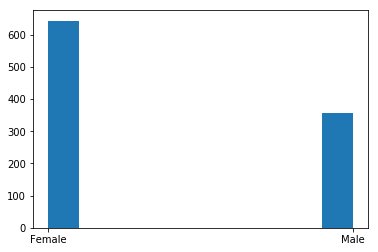

In [2]:
# creating the gender data
gender = ['Male','Female'] # define the values
results = np.random.choice(gender, 1000, p=[0.37,0.63]) # generate 1000 random samples of gender based on the weighting 37% male, 63% female
plt.hist(results)

The code below appears to give the distribution required for the 'Gender' variable.

### Distance

### Duration


### Pace

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


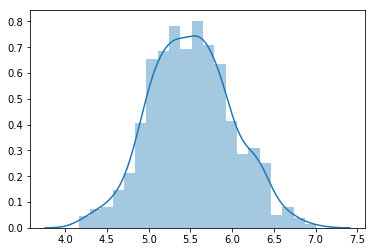

In [3]:
malepace = np.random.normal(5.5,0.5,1000) # 1 is the mean, 0.5 is the standard deviation and 1000 is the size
sns.distplot(malepace) # use seaborn to create plot

### Age

In [4]:
# create dataframe for variables Date, Gender, Distance, Duration, Speed, Age
# create the 'running' dataframe for 1000 different runs showing the gender for each run
# create the variable 'gender' for the data frame unising random.choice

running = pd.DataFrame(np.random.choice(gender,1000,p=[0.37,0.63])) # the random.choice function lets us distribute the data to match the real world data from the Galway Bay marathon
running.columns = ['Gender'] # name the column

In [5]:
running # show the first five rows of data

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
5,Female
6,Female
7,Female
8,Male
9,Male


In [6]:
# add a column for distance to the running dataframe.  sourced from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
distance = []

for row in running.Gender:
    if row in ['Male']:
        distance.append(np.random.triangular(1,2,30)) # note that the min and max run distances we want to create for both male and female are 1 and 30 respectively
    else:
        distance.append(np.random.triangular(1,2,30)) # note that the min and max run distances we want to create for both male and female are 1 and 30 respectively

running['distance'] = distance

In [7]:
running[0:5]

,Gender,distance
0,Male,9.802090
1,Male,5.581525
2,Female,14.840913
3,Female,18.126121
4,Female,13.011387


In [24]:
# add a column for pace.  sourced from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
pace = []

for row in running.Gender:
    if row in ['Male']:
        pace.append(np.random.triangular(3,5.5,14))
    else:
        pace.append(np.random.triangular(3.5,6,14))

running['pace'] = pace

In [25]:
running[0:5]

,Gender,distance,pace,time (mins)
0,Male,9.802090,11.101893,17.712641
1,Male,5.581525,13.599534,16.694893
2,Female,14.840913,3.537466,10.865902
3,Female,18.126121,7.761249,17.049332
4,Female,13.011387,6.645740,4.791184


In [26]:
# add a column for time. Sourced from https://jeffdelaney.me/blog/useful-snippets-in-pandas/
running['time (mins)'] = running['distance'] * running['pace']

In [27]:
running[0:5]

,Gender,distance,pace,time (mins)
0,Male,9.802090,11.101893,108.821758
1,Male,5.581525,13.599534,75.906133
2,Female,14.840913,3.537466,52.499218
3,Female,18.126121,7.761249,140.681338
4,Female,13.011387,6.645740,86.470299


In [28]:
running[['Gender','pace']].describe()

,pace
count,1000.000000
mean,7.715961
std,2.235528
min,3.235981
25%,6.002006
50%,7.453077
75%,9.197438
max,13.917148


In [29]:
# count the number of occurances of male/female for the other variables
running.groupby("Gender").count()

,distance,pace,time (mins)
Gender,,,
Female,638,638,638
Male,362,362,362


In [30]:
# show the mean of the variables for the male and female
running.groupby("Gender").mean()

,distance,pace,time (mins)
Gender,,,
Female,10.749130,7.920424,85.359287
Male,11.261197,7.355608,81.248138


## Plots

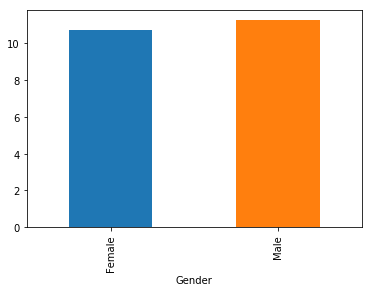

In [31]:
# plot the mean distance for male and female
running.groupby("Gender")["distance"].mean().plot(kind="bar")

Gender
Female    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Male      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

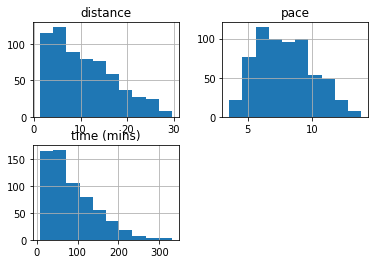

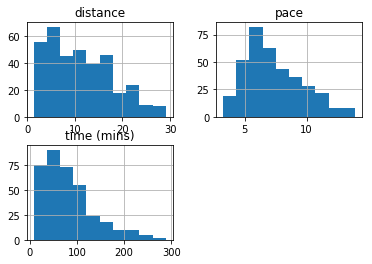

In [32]:
# plot the distribution of males and female in relation to pace 

running.groupby('Gender').hist()

In [17]:
running[0:5]

,Gender,distance,pace,time (mins)
0,Male,9.802090,1.807027,17.712641
1,Male,5.581525,2.991099,16.694893
2,Female,14.840913,0.732159,10.865902
3,Female,18.126121,0.940595,17.049332
4,Female,13.011387,0.368230,4.791184


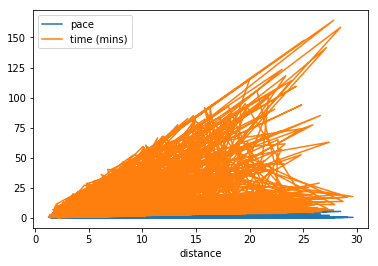

In [18]:
# plot dataframe
running.plot.line('distance')

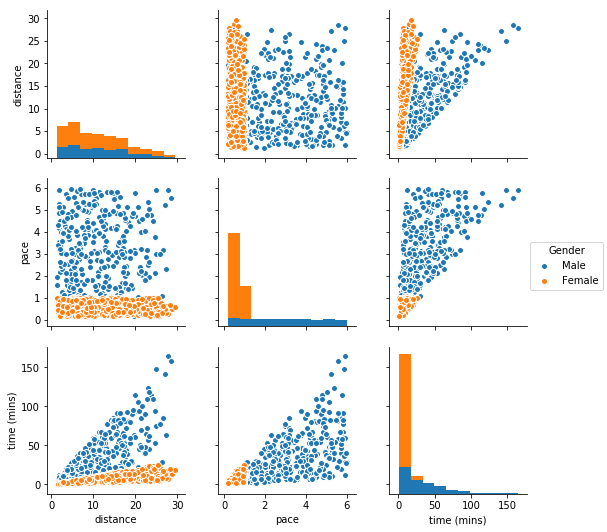

In [19]:
# Plot the running data set with a pair plot.
sns.pairplot(running, hue="Gender")

In [20]:
# get summary table of running dataframe
running.describe()

,distance,pace,time (mins)
count,1000.000000,1000.000000,1000.000000
mean,10.934498,1.456356,16.078026
std,6.766837,1.566015,22.673253
min,1.255259,0.172233,0.360340
25%,5.194816,0.445976,3.257253
50%,9.934294,0.753029,7.297580
75%,15.731288,1.952021,16.432224
max,29.629095,5.998882,164.296891


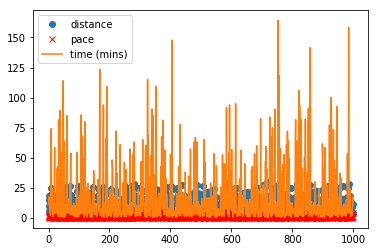

In [21]:
running.plot(style=['o','rx'])

## References
1 - https://www.youtube.com/watch?v=3GpvWlVinf0

2 - https://realpython.com/python-random/

3 - https://arxiv.org/abs/0711.3199

4 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html

5 - https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

6 - https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

7 - https://stackoverflow.com/questions/30026815/add-multiple-columns-to-pandas-dataframe-from-function

8 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.assign.html

9 - https://gist.github.com/uupaa/f77d2bcf4dc7a294d109

10 - http://www.redtagtiming.com/results/RunGalwaybay2018_10km.pdf

11 - http://www.redtagtiming.com/results/RunGalwaybay2018_21km.pdf

12 - http://www.redtagtiming.com/results/RunGalwaybay2018_42km.pdf

13 - https://thelogicofscience.com/2016/10/10/basic-statistics-part-5-means-vs-medians-is-the-average-reliable/amp/

14 - http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/
